In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
#1.Show the dataframe shape.
data.shape

(10910, 26)

# Standardize headers

In [4]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [6]:
data =  data.rename(columns={'EmploymentStatus':'Employment Status'})

In [7]:
cols = []
for colname in data.columns:
    cols.append(colname.lower())
data.columns = cols

In [8]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [9]:
#3. Which columns are numerical?
data.select_dtypes(np.number)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
#4. Which columns are categorical?
data.select_dtypes(object)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Check and deal with NaN values.

In [11]:
sum(data.duplicated())
data = data.drop_duplicates()
data.isna().sum()

customer                            0
state                             614
customer lifetime value             0
response                          614
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [12]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.65
2,customer lifetime value,0.00
3,response,5.65
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [13]:
data['vehicle type'].unique()

array([nan, 'A'], dtype=object)

In [14]:
data = data[data['state'].isna()==False]  #delete when very few

In [15]:
data = data[data['response'].isna()==False] #delete when very few
data.shape
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           582
months since policy inception       0
number of open complaints         582
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     579
vehicle size                      579
vehicle type                     5157
dtype: int64

In [16]:
#half of vehicle type is nan, lets see
data['vehicle type'].unique()

array([nan, 'A'], dtype=object)

In [17]:
#only nan and A, so make the nans A
data['vehicle type'] = data['vehicle type'].fillna('Unknown')

In [18]:
data["number of open complaints"].value_counts(dropna=False)

0.0    7688
1.0    1073
NaN     582
2.0     392
3.0     303
4.0     161
5.0      60
Name: number of open complaints, dtype: int64

In [19]:
data = data[data['months since last claim'].isna()==False] 
print(data.isna().sum())
data.shape

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    543
vehicle size                     543
vehicle type                       0
dtype: int64


(9677, 25)

In [20]:
data = data[data['vehicle class'].isna()==False] 
print(data.isna().sum())
data.shape

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64


(9134, 25)

In [21]:
data['month'] = pd.DatetimeIndex(data['effective to date']).month

In [22]:
data[data.month.isin([1,2,3])].sort_index(ascending=True).sample(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
6297,HE12295,California,4446.738622,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,3,Personal Auto,Personal L1,Offer1,Branch,616.279356,Four-Door Car,Medsize,A,2
10559,OA46321,Oregon,15512.249970,No,Basic,College,1/17/11,Employed,M,54833,...,3,Corporate Auto,Corporate L3,Offer3,Agent,1396.702365,Luxury Car,Large,A,1
8956,MD87746,Oregon,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,...,2,Personal Auto,Personal L2,Offer2,Agent,231.201886,Two-Door Car,Medsize,A,2
8991,KL83882,Nevada,6639.328932,No,Extended,Bachelor,2/15/11,Employed,F,72661,...,4,Personal Auto,Personal L3,Offer1,Branch,398.400000,Four-Door Car,Small,Unknown,2
1879,DV58197,California,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,A,1


In [23]:
data['month'].unique()    #so this data already about first 2 months of the year

array([2, 1], dtype=int64)

# lab 3

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   

In [25]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 
# %matplotlib inline

In [27]:
data['response'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [30]:
#set a new column for responses in numeric value
data['response_num'] = data['response'].map(dict(Yes=1, No=0))

<AxesSubplot:xlabel='response', ylabel='count'>

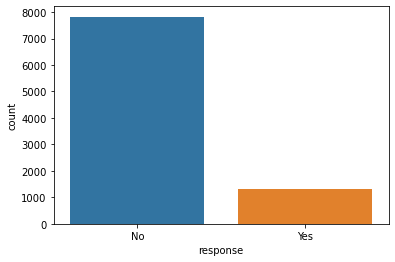

In [36]:
sns.countplot(x=data['response'])

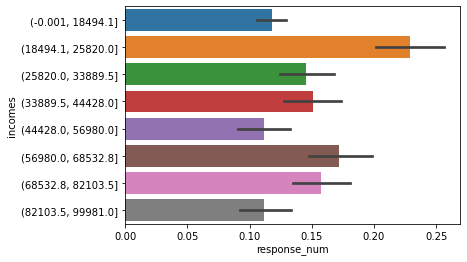

In [38]:
data['incomes'] = pd.qcut(data['income'], q=10, duplicates='drop')
sns.barplot(x = data["response_num"], y = data['incomes'])
plt.show()

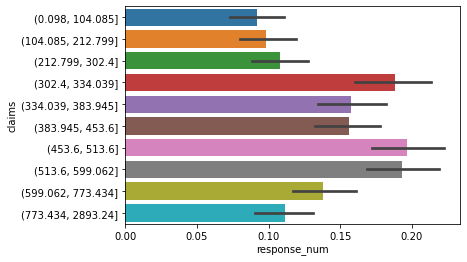

In [42]:
data['claims'] = pd.qcut(data['total claim amount'], q=10)
sns.barplot(x = data["response_num"], y = data['claims'])
plt.show()
